![](logo.png)

# Unidad: Regresíon - Sesión 2

### Regresión (desde la econometría)

## Sobre el ejemplo


* En esta sesión trabajaremos una base de datos sobre los precios de las viviendas en Boston, utilizada en el paper _Harrison Jr, D., & Rubinfeld, D. L. (1978). Hedonic housing prices and the demand for clean air. Journal of environmental economics and management, 5(1), 81-102._

* Nuestro objetivo es desarrollar un modelo predictivo para el valor mediano de las casas mediante el entrenamiento de un modelo de regresión lineal. 



`crim`: Tasa de criminalidad por sector de Boston  
`zn` proporción de terreno residencial asignado para terrenos baldíos.  
`indus` proporción de negocios no asociados al comercio por sector.  
`chas` Dummy. 1 si el sector colinda con el río Charles, 0 de lo contrario.  
`nox` Concentración de dióxido de carbono  
`rm` cantidad promedio de habitaciones por  casa.  
`age` proporción de casas construídas antes de 1940  
`dis` distancia promedio a cinco centros de empleos.  
`rad` índice de accesibilidad a autopistas.  
`tax` nivel de impuestos asociados a viviendas.  
`ptratio` razón alumno:profesor por sector de Boston.  
`black` proporción de afroamericanos por sector de Boston.  
`lstat` porcentaje de población de estratos bajos.  
`medv` valor mediano de las casas   

## Ejercicio 1: Prepare el ambiente de trabajo

* Importe las librerías básicas para el análisis de datos.
* Importe el módulo `linear_model`, y las funciones `mean_squared_error`, `r2_score` y `train_test_split`.
* Importe la base de datos `boston.csv` y elimine la columna `Unnamed: 0`.
* Obtenga las medidas descriptivas de la base de datos con `.describe()`.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('boston.csv')
df = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']]

In [3]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [4]:
df = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']]

In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Ejercicio 2: División de la muestra

* Genere conjuntos de entrenamiento y validación con `train_test_split`.
* Genere segmentaciones del 33% para las muestras de validación.
* Incluya una semilla pseudoaleatoria


In [6]:
y_vec = df.loc[:, 'medv']
x_vec = df.loc[:,'crim':'lstat']

X_train, X_test, y_train, y_test = train_test_split(x_vec, y_vec, test_size=.33, random_state=3)

## Ejercicio 3: Generación de modelos

* Ahora implementaremos dos versiones del modelo lineal:
    1. Con intercepto y atributos normalizados.
    - Sin intercepto y atributos no normalizados.

* Cada versión debe generarse en un nuevo objeto inicializado.
* Posteriormente se deben entrenar los modelos especificando la matriz y vector de entrenamiento.
* Con los modelos entrenados, genere una predicción de matriz de validación.

In [7]:
modelo1 = linear_model.LinearRegression(fit_intercept=True, normalize=True)

In [8]:
modelo1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [9]:
modelo2 = linear_model.LinearRegression(fit_intercept=False, normalize=False)

modelo2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [10]:
medv_1 = modelo1.predict(X_test)

In [11]:
medv_2 = modelo2.predict(X_test)

## Ejercicio 4: Obtención de métricas 

* Ahora generemos una función llamada `report_scores` que ingrese como argumentos el vector de datos predichos y el vector de datos por validar.
* La función debe imprimir las métricas del Error Cuadrático Promedio y R2.
* Reporte las métricas para ambos modelos. En base a ello, seleccione el mejor modelo.

In [26]:
def report_scores(test, prediccion):
    m1_mse = mean_squared_error(test, prediccion).round(1)
    m1_r2 = r2_score(test, prediccion).round(2)
    print("Mean Squared Error: ", m1_mse)
    print("R-cuadrado: ", m1_r2)

In [13]:
report_scores(y_test, medv_1)

Mean Squared Error:  23.3
R-cuadrado:  0.71


In [27]:
report_scores(y_test, medv_2)

Mean Squared Error:  27.6
R-cuadrado:  0.66


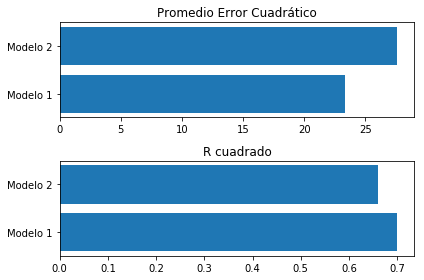

In [39]:
plt.subplot(2,1,1)
plt.barh(['Modelo 1', 'Modelo 2'], [mean_squared_error(y_test, medv_1).round(1), mean_squared_error(y_test, medv_2).round(1)])
plt.title("Promedio Error Cuadrático")
plt.subplot(2,1, 2)
plt.barh(['Modelo 1', 'Modelo 2'], [r2_score(y_test, medv_1).round(1), r2_score(y_test, medv_2).round(2)])
plt.title("R cuadrado");
plt.tight_layout()

El mejor modelo es el primero, con intercepto y atributos normalizados


## Ejercicio 5: Refactorización del modelo

* Genere una función llamada `fetch_features` que ingrese como argumentos la base de datos y el nombre del vector objetivo. El nombre del vector debe ser `medv` por defecto
* La función debe retornar una lista con las correlaciones entre cada atributo y el vector objetivo y su nombre.
* Reporte brevemente cuales los 6 atributos con una mayor correlación con `medv`


In [15]:
def fetch_features(database, vector='medv'):
    # extraemos los nombres de las columnas en la base de datos
    columns = df.columns

    # generamos 3 arrays vacíos para guardar los valores
    # nombre de la variable
    attr_name = []
    # correlación de pearson
    pearson_r = []
    # valor absoluto de la correlación
    abs_pearson_r = []

    # para cada columna en el array de columnas
    for col in columns:
        # si la columna no es la dependiente
        if col != vector:
            # adjuntar el nombre de la variable en attr_name
            attr_name.append(col)
            # adjuntar la correlación de pearson
            pearson_r.append(df[col].corr(df[vector]))
            # adjuntar el absoluto de la correlación de pearson
            abs_pearson_r.append(abs(df[col].corr(df[vector])))

    # transformamos los arrays en un DataFrame
    features = pd.DataFrame({
        'attribute': attr_name,
        'corr':pearson_r,
        'abs_corr':abs_pearson_r
    })

    # generamos el index con los nombres de las variables
    features = features.set_index('attribute')
    # ordenamos los valores de forma descendiente
    return(features.sort_values(by=['abs_corr'], ascending=False))
    

In [16]:
fetch_features(df)

,corr,abs_corr
attribute,,
lstat,-0.737663,0.737663
rm,0.695360,0.695360
ptratio,-0.507787,0.507787
indus,-0.483725,0.483725
tax,-0.468536,0.468536
nox,-0.427321,0.427321
crim,-0.388305,0.388305
rad,-0.381626,0.381626
age,-0.376955,0.376955


Los más immportantes son lstat, rm, ptratio, indus, tax, nox

## Ejercicio 6: Refactorización del modelo predictivo

* Genere otros conjuntos de entrenamiento y validación en base a una matriz con los 6 atributos identificados y el vector objetivo.
* Entrene un modelo en base al mejor desempeño.
* Reporte las métricas para el nuevo modelo.


In [42]:
y_vec2 = df.loc[:, 'medv']
x_vec2 = df[['lstat', 'rm', 'ptratio', 'indus','tax']]

X_train_rf2, X_test_rf2, y_train_rf2, y_test_rf2 = train_test_split(x_vec2, y_vec2, test_size=.33, random_state=3)
modelo3 = linear_model.LinearRegression(fit_intercept=True, normalize=True)
modelo3.fit(X_train_rf2, y_train_rf2)

medv_3 = modelo3.predict(X_test_rf2)
report_scores(y_test_rf2, medv_3)

Mean Squared Error:  28.0
R-cuadrado:  0.66


In [47]:
y_vec2 = df.loc[:, 'medv']
x_vec2 = df[['lstat', 'rm', 'ptratio', 'indus','tax','nox','crim','rad','age','zn','black','dis']]

X_train_rf2, X_test_rf2, y_train_rf2, y_test_rf2 = train_test_split(x_vec2, y_vec2, test_size=.33, random_state=3)
modelo4 = linear_model.LinearRegression(fit_intercept=True, normalize=True)
modelo4.fit(X_train_rf2, y_train_rf2)
 
medv_4 = modelo4.predict(X_test_rf2)
report_scores(y_test_rf2, medv_4)

Mean Squared Error:  22.5
R-cuadrado:  0.72


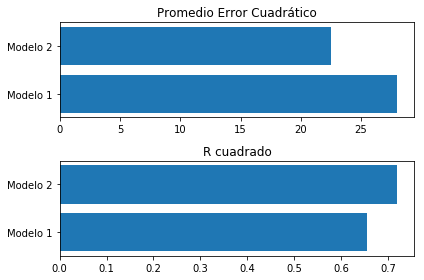

In [38]:
plt.subplot(2,1,1)
plt.barh(['Modelo 1', 'Modelo 2'], [mean_squared_error(y_test_rf2, medv_3).round(1), mean_squared_error(y_test_rf2, medv_4).round(1)])
plt.title("Promedio Error Cuadrático")
plt.subplot(2,1, 2)
plt.barh(['Modelo 1', 'Modelo 2'], [r2_score(y_test_rf2, medv_3.round(1)), r2_score(y_test_rf2, medv_4).round(2)])
plt.title("R cuadrado");
plt.tight_layout()

Bajo la lógica del Machine Learning, el que da el menor promedio de error cuadrático es el Modelo n°2

## Extra

In [40]:
def coefplot(model, varnames=True, intercept=False, fit_stats=True, figsize=(7, 12)):
   """
   coefplot - Visualize coefficient magnitude and approximate frequentist significance from a model.
   
   @parameters:
       - model: a `statsmodels.formula.api` class generated method, which must be already fitted.
       - varnames: if True, y axis will contain the name of all of the variables included in the model. Default: True
       - intercept: if True, coefplot will include the $\beta_{0}$ estimate. Default: False.
       - fit_stats: if True, coefplot will include goodness-of-fit statistics. Default: True.
       
   @returns:
       - A `matplotlib` object.
   """
   if intercept is True:
       coefs = model.params.values
       errors = model.bse
       if varnames is True:
           varnames = model.params.index
   else:
       coefs = model.params.values[1:]
       errors = model.bse[1:]
       if varnames is True:
           varnames = model.params.index[1:]
           
   tmp_coefs_df = pd.DataFrame({'varnames': varnames, 'coefs': coefs,'error_bars': errors})
   fig, ax = plt.subplots(figsize=figsize)
   ax.errorbar(y=tmp_coefs_df['varnames'], x=tmp_coefs_df['coefs'],
               xerr=tmp_coefs_df['error_bars'], fmt='o',
               color='slategray', label='Estimated point')
   ax.axvline(0, color='tomato', linestyle='--', label='Null Effect')
   ax.set_xlabel(r'$\hat{\beta}$')
   fig.tight_layout()
   plt.legend(loc='best')
   
   if fit_stats is True:
       if 'linear_model' in model.__module__.split('.'):
           plt.title(r'R$^{2}$' + "={0}, f-value={1}, n={2}".format(round(model.rsquared, 2),
                                                                    round(model.f_pvalue, 3),
                                                                    model.nobs))
       elif 'discrete_model' in model.__module__.split('.'):
           plt.title("Loglikelihood = {0}, p(ll-Rest)={1}, n={2}".format(round(model.llf, 2),
                                                                         round(model.llr_pvalue, 3),
                                                                         model.nobs))

In [51]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [52]:
def saturated_model(df, dependent, estimation=smf.ols,fit_model=True):
   tmp_vars = "+".join(df.columns.drop(dependent))
   tmp_model = estimation(dependent+ '~ '+ tmp_vars, df)
   if fit_model is True:
       tmp_model = tmp_model.fit()
   
   return tmp_model

In [57]:
modelo_lineal = saturated_model(df, 'medv')
modelo_lineal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 19 Jul 2018   Prob (F-statistic):          6.72e-135
Time:                        21:17:55   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

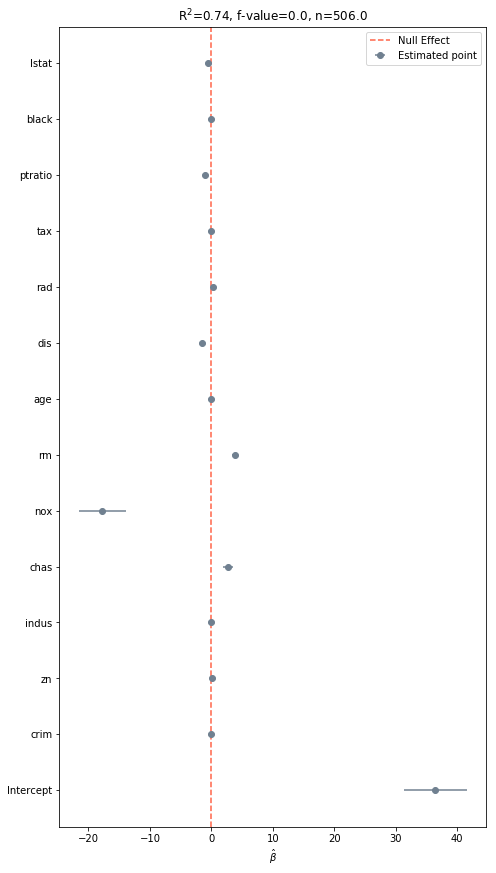

In [56]:
coefplot(modelo_lineal, intercept = True)